#Project 11 - Association Rule Learning - Wilfredo Aaron Sosa Ramos

#Data Engineering Lifecycle

#Phase 1: Ingestion

In [1]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Source: https://www.kaggle.com/code/nalkrolu/association-rules-and-classification-mushrooms

#Acknowledgements:
This dataset was originally donated to the UCI Machine Learning repository. (Koroglu, 2021)

# About this file (Koroglu, 2021):

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/AI/Project 11/dataset/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.shape

(8124, 23)

In [7]:
df['class'].replace(['e','p'],['Edible','Poisonous'],inplace=True)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,Edible,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,Edible,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,Poisonous,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,Edible,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Visualize the data

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


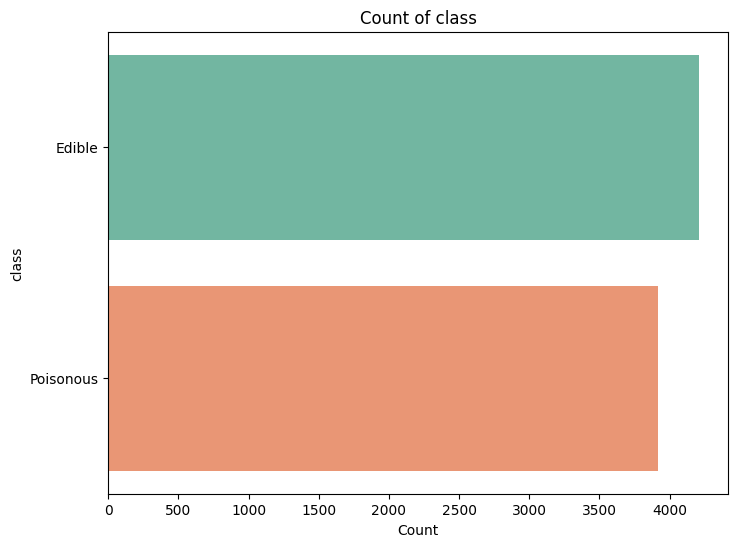

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


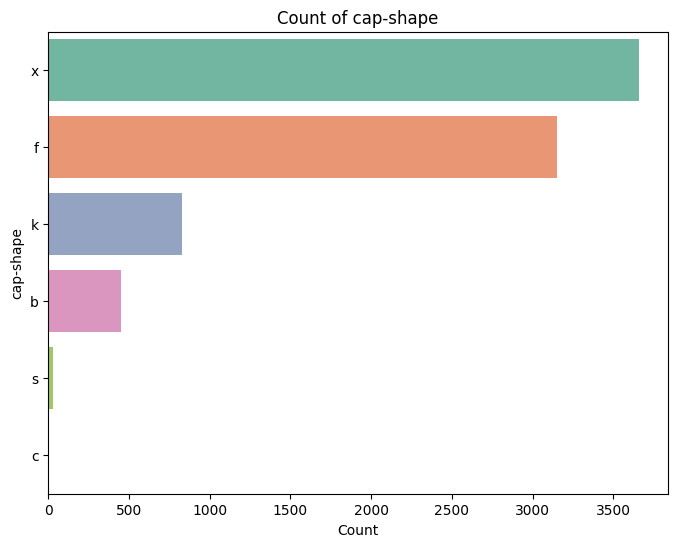

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


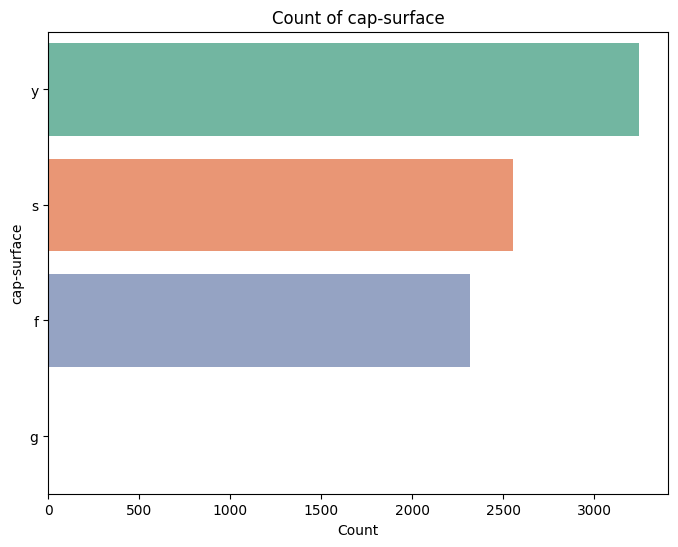

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


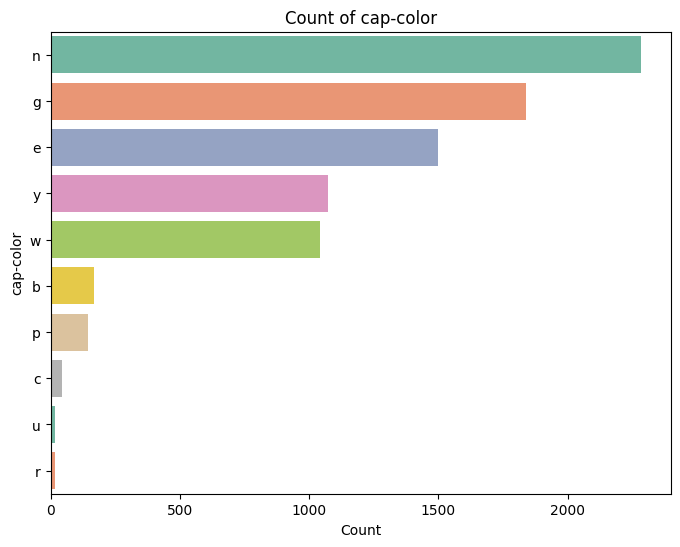

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


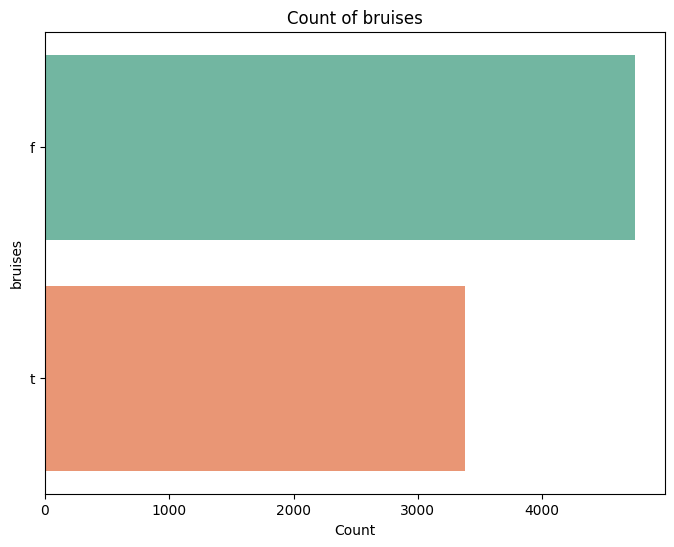

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


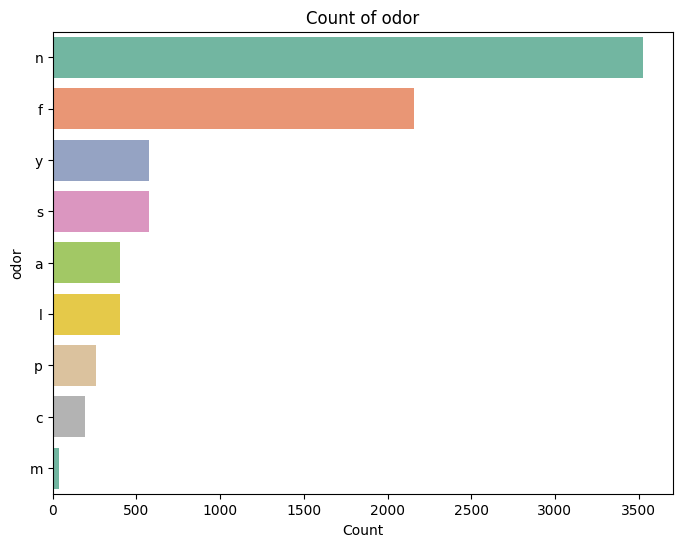

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


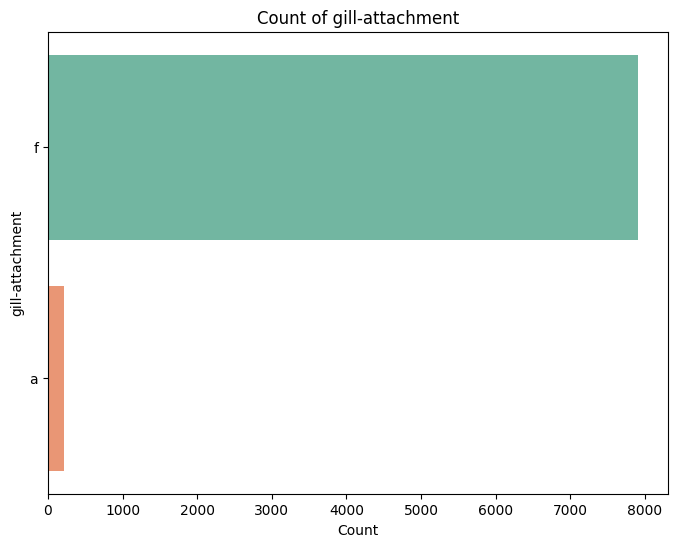

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


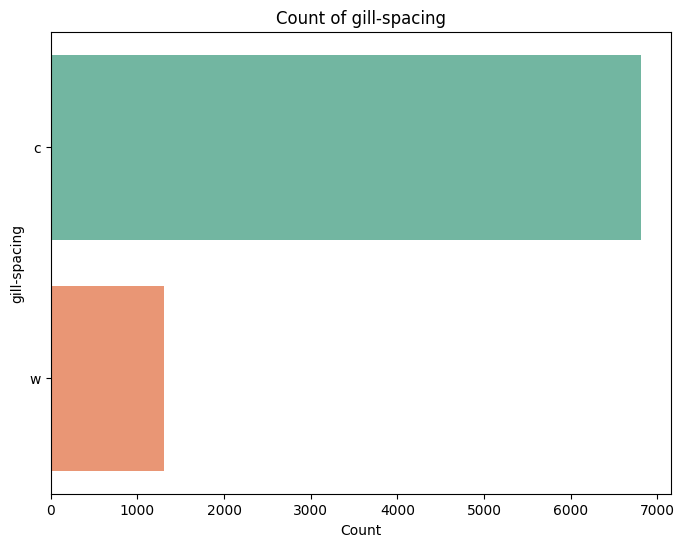

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


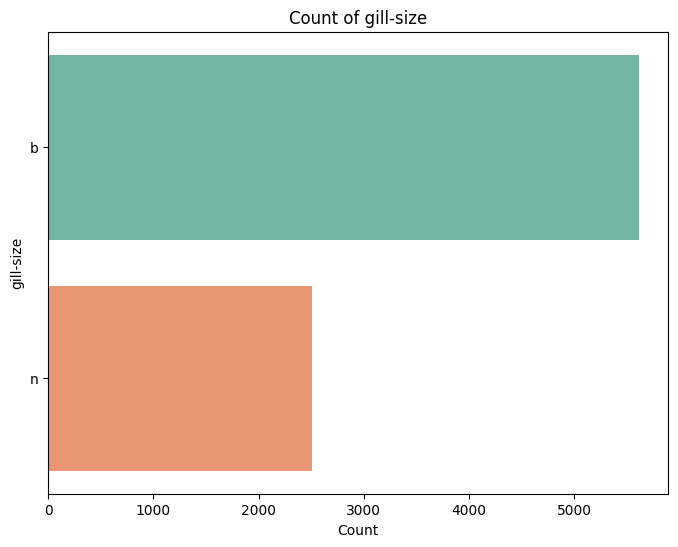

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


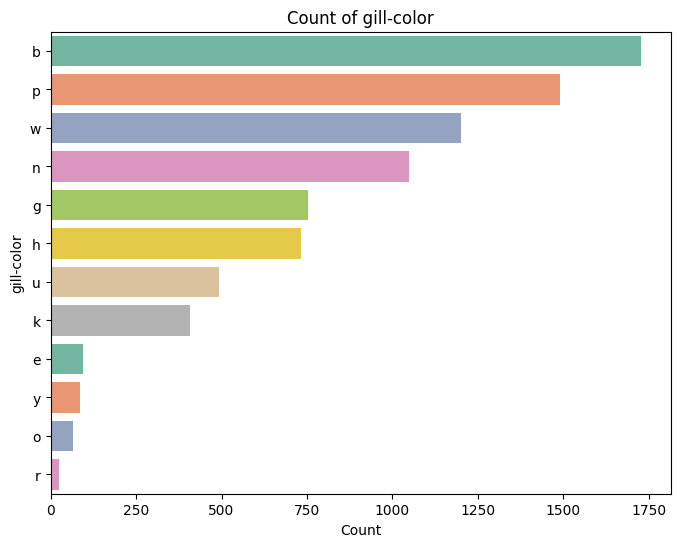

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


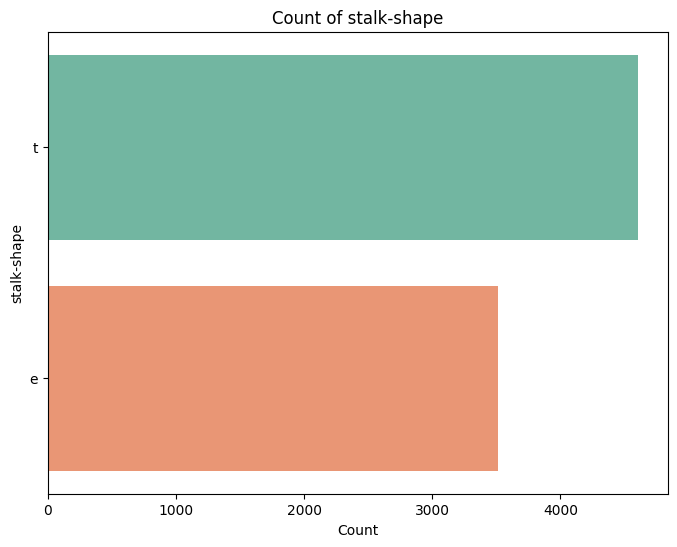

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


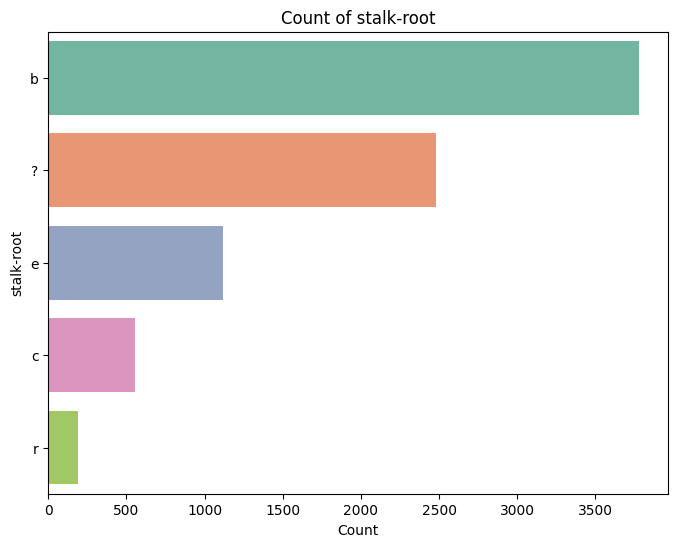

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


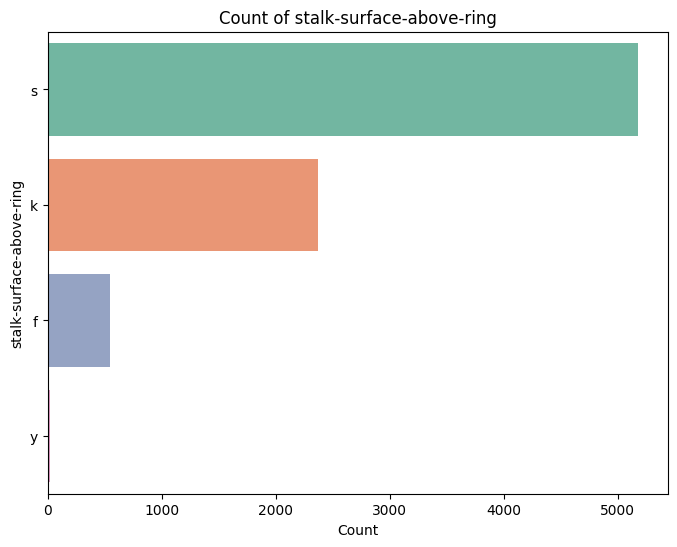

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


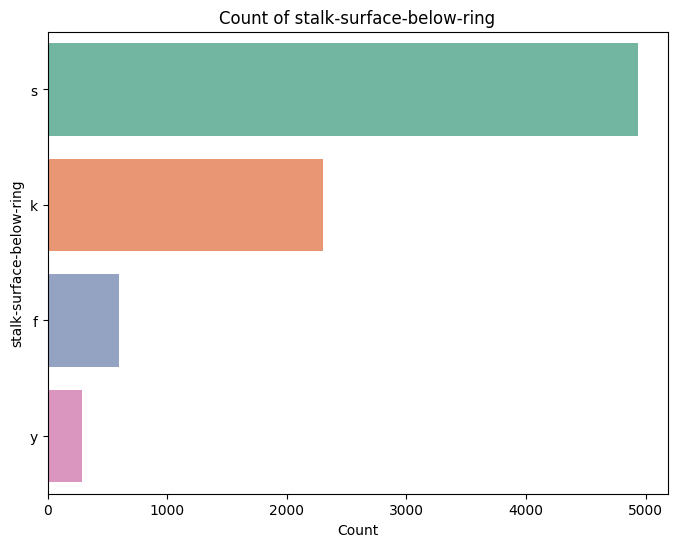

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


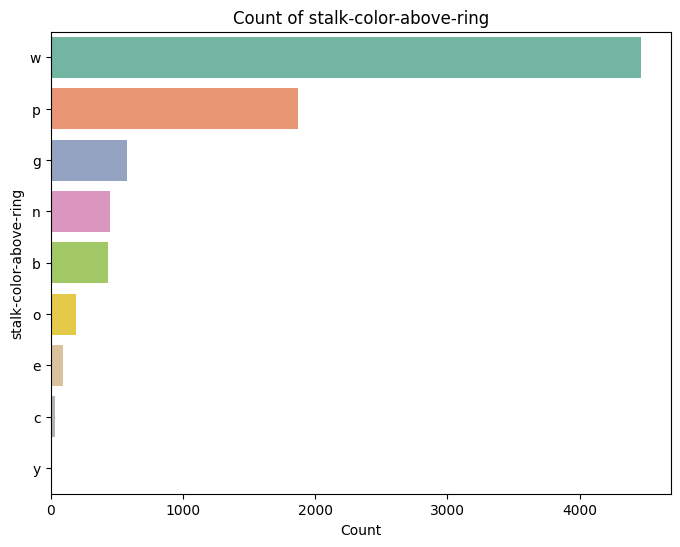

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


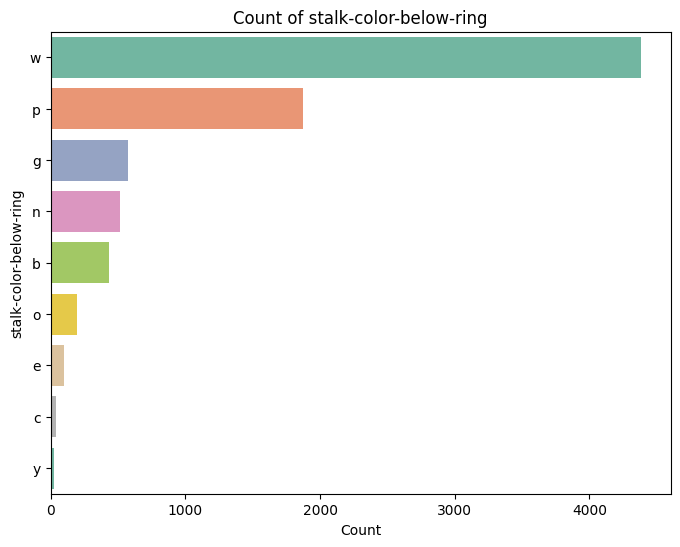

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


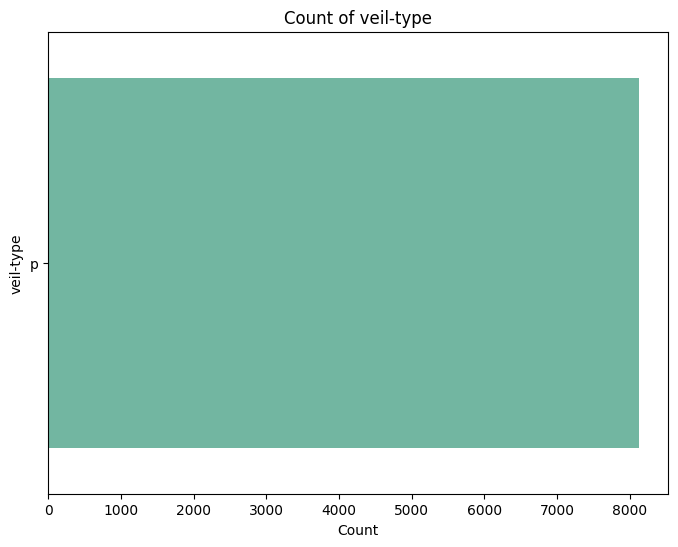

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


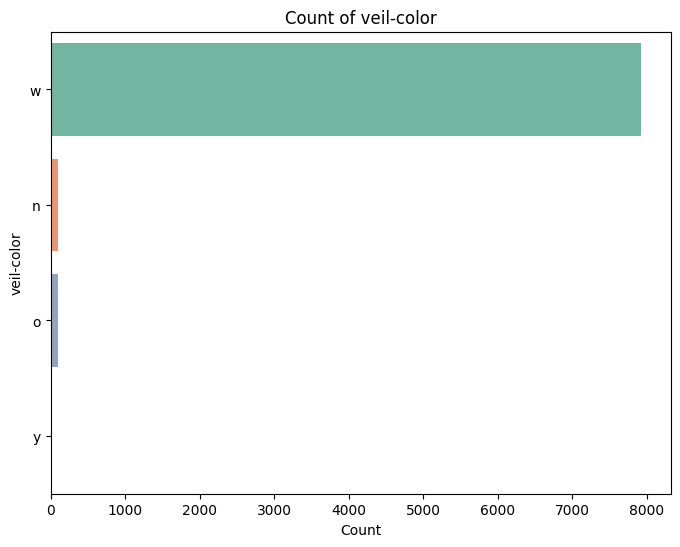

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


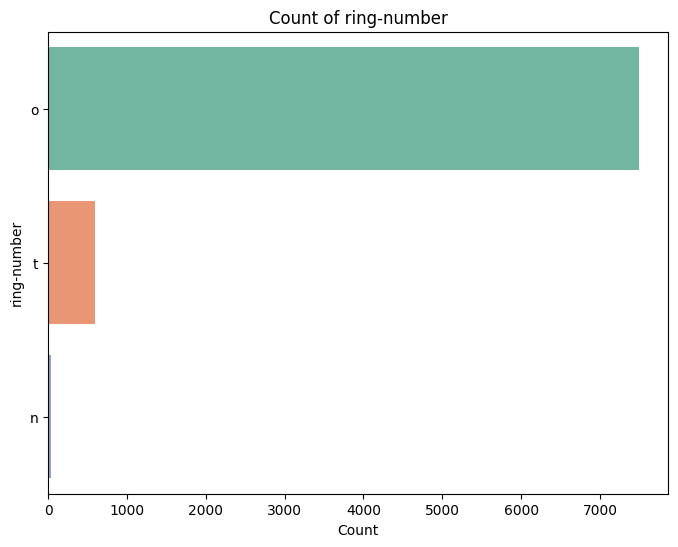

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


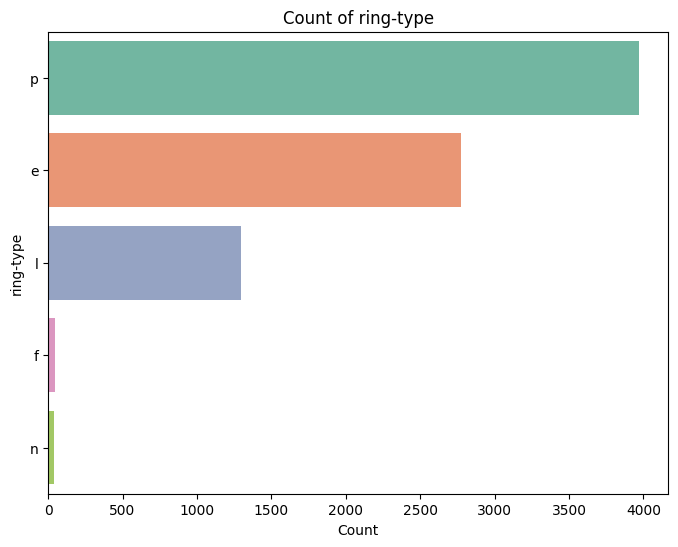

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


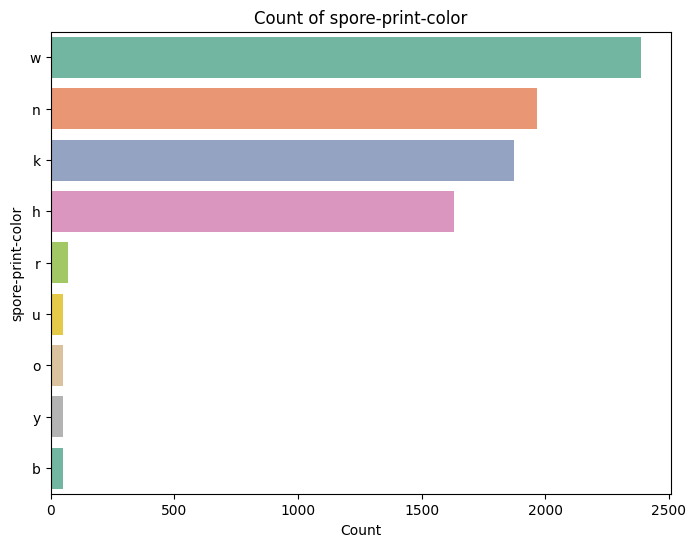

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


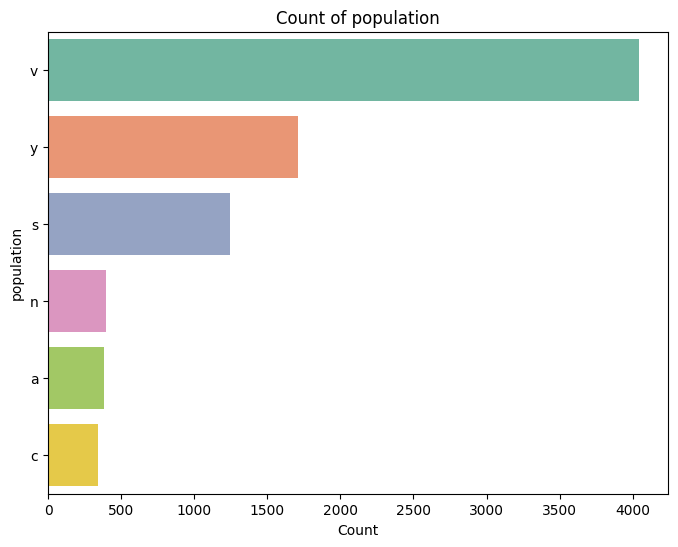

<ipython-input-8-8452dc576724>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


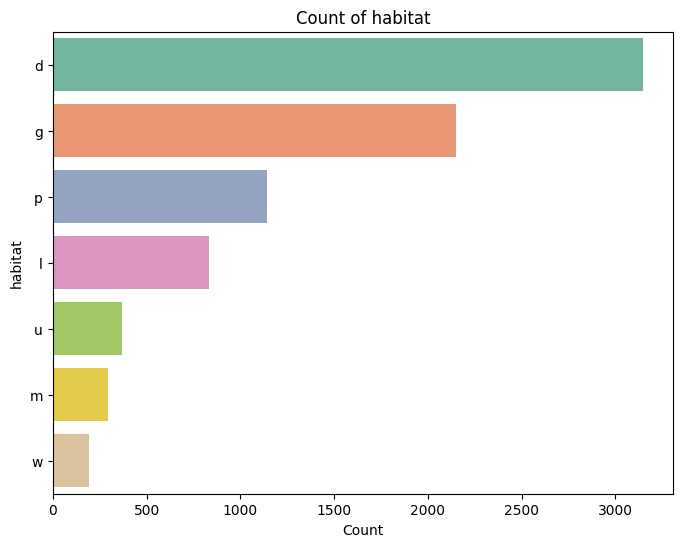

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_charts(df):
  # Categorical features
  categorical_features = [col for col in df.columns if df[col].dtype == 'object']
  for feature in categorical_features:
      plt.figure(figsize=(8, 6))
      sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')
      plt.title(f'Count of {feature}')
      plt.xlabel('Count')
      plt.ylabel(feature)
      plt.show()

plot_charts(df)

# Phase 2: Transformation

In [9]:
cat_features = df.select_dtypes(include=['object']).columns.tolist()

In [10]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [13]:
label_encoder = LabelEncoder()

In [14]:
standard_scaler = StandardScaler()

In [15]:
X = df.drop('class', axis=1)
y = df['class']

In [16]:
X_encoded = pd.get_dummies(df,prefix_sep="_")
y_encoded = label_encoder.fit_transform(y)

In [17]:
X_scaled = standard_scaler.fit_transform(X_encoded)

In [18]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [19]:
classes = ['p','e']

# Phase 3: Serving

New Classification Approach (https://www.kaggle.com/code/nalkrolu/association-rules-and-classification-mushrooms)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

from yellowbrick.classifier import ROCAUC,ConfusionMatrix
from sklearn.metrics import accuracy_score

def Performance(model):
    global X_train,y_train,X_val,y_val,X_test,X_train,classes

    print("REPORT:")
    print(classification_report(y_val,model.predict(X_val)))
    print(classification_report(y_test,model.predict(X_test)))

    visualizer = ROCAUC(model, classes=classes)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_val, y_val)
    visualizer.score(X_test, y_test)
    visualizer.show();

    plt.figure(figsize=(3,3))
    cm = ConfusionMatrix(model, classes=classes)
    cm.fit(X_train, y_train)
    cm.score(X_val, y_val)
    cm.score(X_test, y_test)
    plt.xticks(rotation=0)
    cm.show();

In [21]:
from sklearn.model_selection import cross_val_score
def CrossValidationScore(model_list):
    global X_scaled,y_encoded

    mean_cross_val_score = []
    model_name           = []

    for model in model_list:
        model_name.append(type(model).__name__)

    for i in model_list:
        scores = cross_val_score(i, X_scaled, y_encoded, cv=5)
        mean_cross_val_score.append(scores.mean())

    cvs = pd.DataFrame({"Model Name":model_name,"CVS":mean_cross_val_score})
    return cvs.style.background_gradient("Greens")

# Models

# Multi-Layer Perceptron (MCP)

The training time is:  5.628306150436401
REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       804
           1       1.00      1.00      1.00       821

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



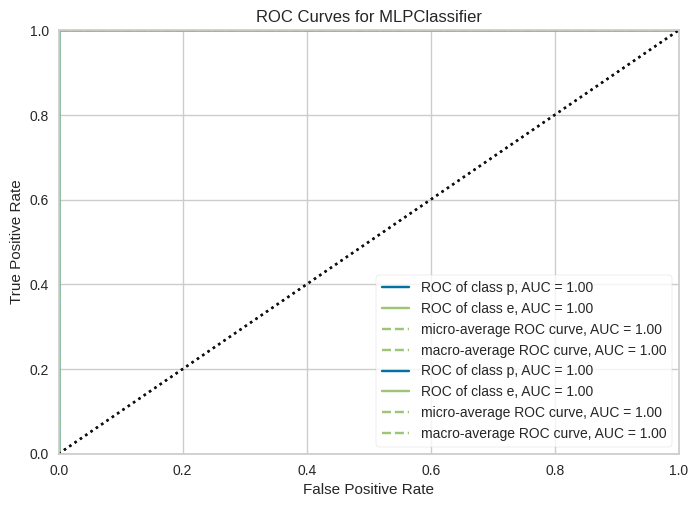

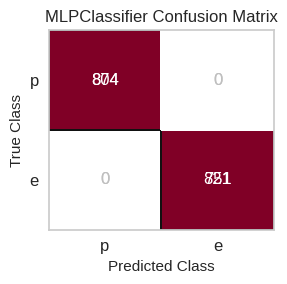

In [22]:
from sklearn.neural_network import MLPClassifier
import time

start_time = time.time()
mlp = MLPClassifier(hidden_layer_sizes=(64,128,64),activation="relu",max_iter=500,solver="adam")
mlp.fit(X_train,y_train)
end_time = time.time()

training_time = end_time - start_time
print("The training time is: ",training_time)

Performance(mlp)

#Random Forest Classifier

The training time is:  1.0968093872070312
REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       804
           1       1.00      1.00      1.00       821

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



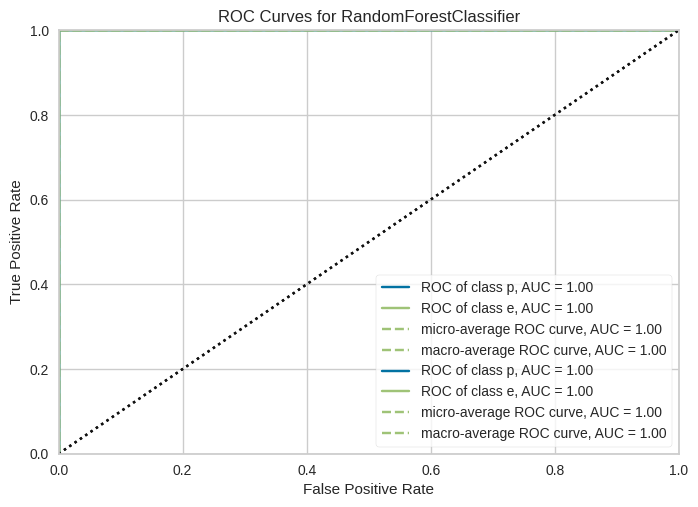

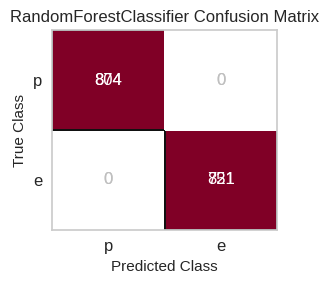

In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

start_time = time.time()
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train,y_train)
end_time = time.time()

training_time = end_time - start_time
print("The training time is: ",training_time)

Performance(rfc)

#Gradient Boosting Classifier

The training time is:  1.279634952545166
REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       804
           1       1.00      1.00      1.00       821

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



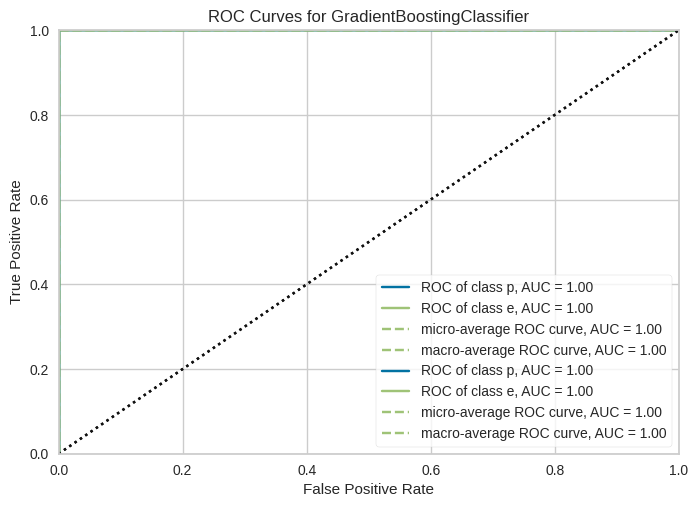

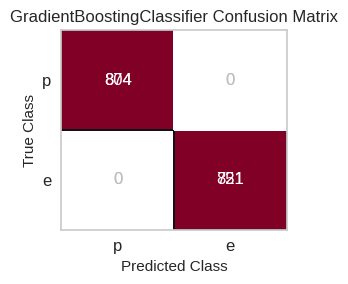

In [24]:
start_time = time.time()
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
end_time = time.time()

training_time = end_time - start_time
print("The training time is: ",training_time)

Performance(gbc)

#XGBoost with Random Forest

The training time is:  2.3814074993133545
REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       804
           1       1.00      1.00      1.00       821

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



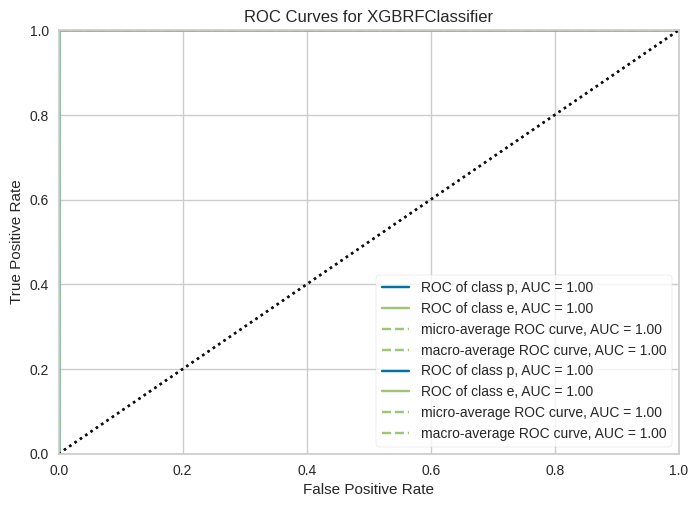

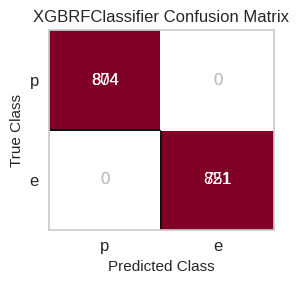

In [25]:
from xgboost import XGBClassifier,XGBRFClassifier

start_time = time.time()
xrfc = XGBRFClassifier()
xrfc.fit(X_train,y_train)
end_time = time.time()

training_time = end_time - start_time
print("The training time is: ",training_time)

Performance(xrfc)

#XGBoost

The training time is:  0.9841809272766113
REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       804
           1       1.00      1.00      1.00       821

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



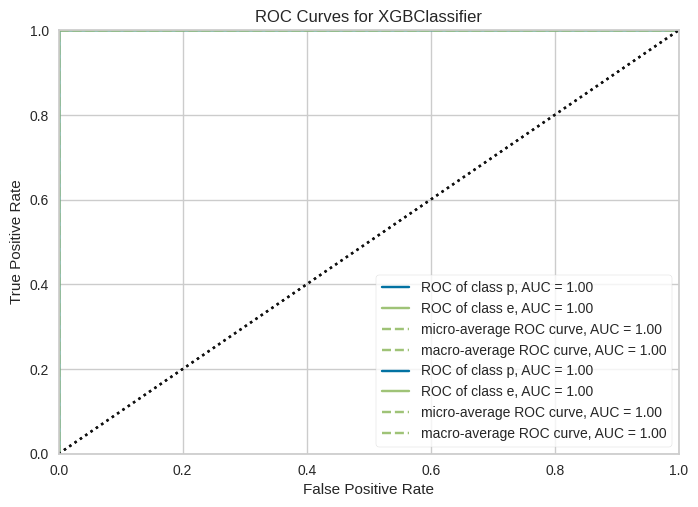

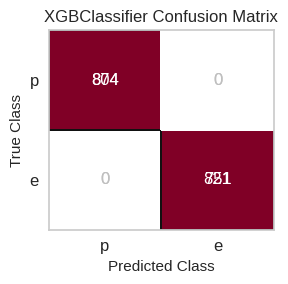

In [26]:
start_time = time.time()
xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)
end_time = time.time()

training_time = end_time - start_time
print("The training time is: ",training_time)

Performance(xgbc)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from lightgbm import LGBMClassifier

# Logistic Classifier

The training time is:  0.0681314468383789
REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       804
           1       1.00      1.00      1.00       821

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



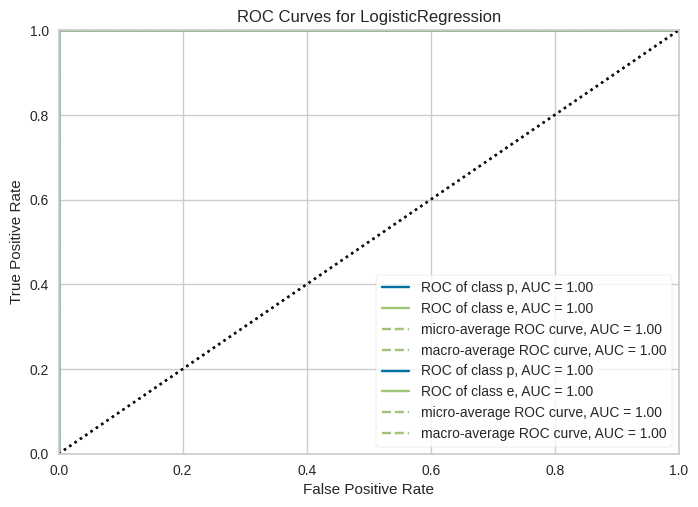

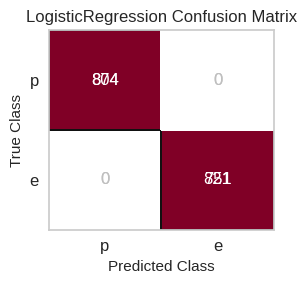

In [28]:
start_time = time.time()
lgg = LogisticRegression()
lgg.fit(X_train,y_train)
end_time = time.time()

training_time = end_time - start_time
print("The training time is: ",training_time)

Performance(lgg)

# Decision Tree Classifier

The training time is:  0.013121366500854492
REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       804
           1       1.00      1.00      1.00       821

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



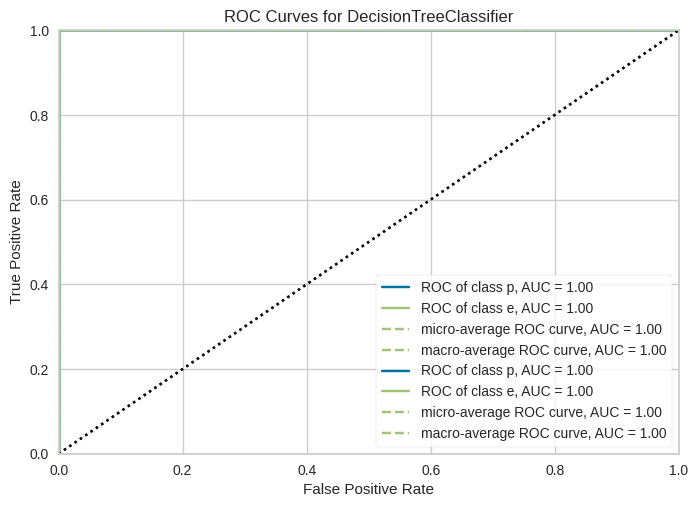

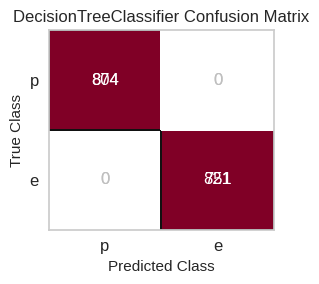

In [29]:
start_time = time.time()
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
end_time = time.time()

training_time = end_time - start_time
print("The training time is: ",training_time)

Performance(dtc)

#Linear SVC

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The training time is:  0.30429863929748535
REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       804
           1       1.00      1.00      1.00       821

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



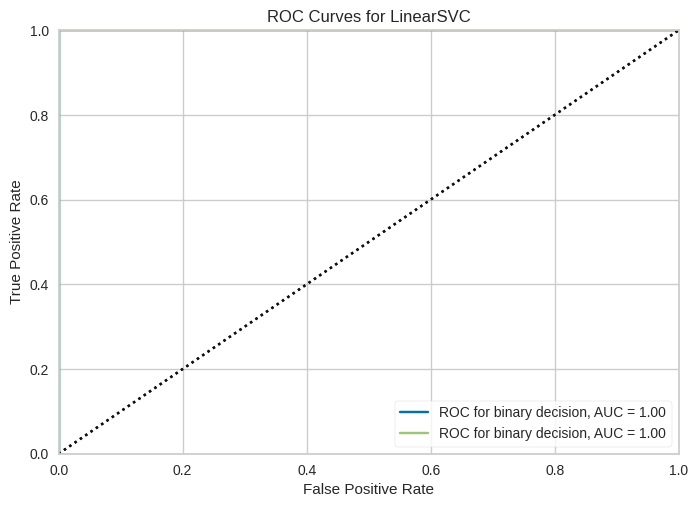

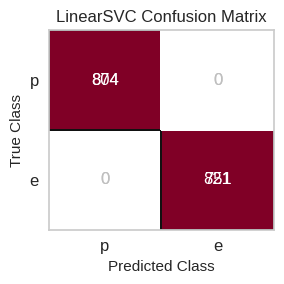

In [30]:
def PerformanceForSVC(model):
    global X_train,y_train,X_val,y_val,X_test,X_train,classes

    print("REPORT:")
    print(classification_report(y_val,model.predict(X_val)))
    print(classification_report(y_test,model.predict(X_test)))

    visualizer = ROCAUC(lsvc, classes=classes, binary=True)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_val, y_val)
    visualizer.score(X_test, y_test)
    visualizer.show();

    plt.figure(figsize=(3,3))
    cm = ConfusionMatrix(model, classes=classes)
    cm.fit(X_train, y_train)
    cm.score(X_val, y_val)
    cm.score(X_test, y_test)
    plt.xticks(rotation=0)
    cm.show();

start_time = time.time()
lsvc = LinearSVC()
lsvc.fit(X_train,y_train)
end_time = time.time()

training_time = end_time - start_time
print("The training time is: ",training_time)
PerformanceForSVC(lsvc)

# SVC

The training time is:  0.7195837497711182
REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       804
           1       1.00      1.00      1.00       821

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



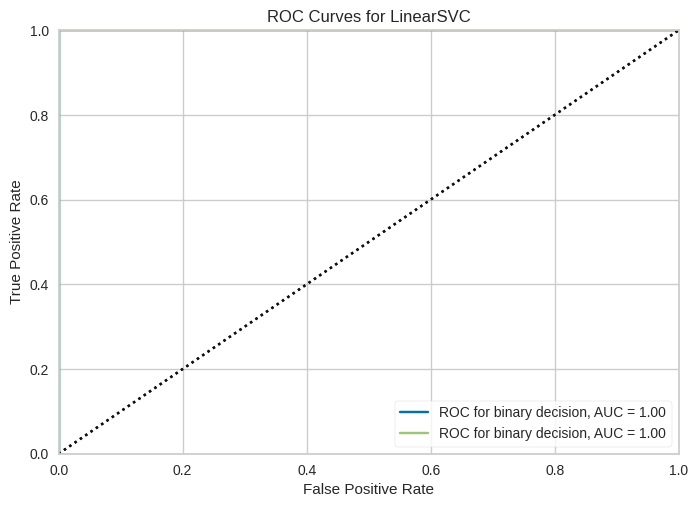

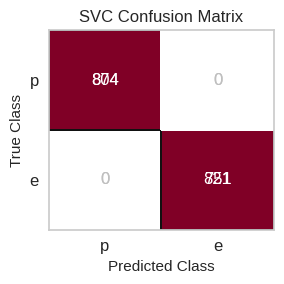

In [31]:
start_time = time.time()
svc = SVC()
svc.fit(X_train,y_train)
end_time = time.time()

training_time = end_time - start_time
print("The training time is: ",training_time)
PerformanceForSVC(svc)

#k-Nearest Neighbors

The training time is:  0.0022084712982177734
REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       804
           1       1.00      1.00      1.00       821

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



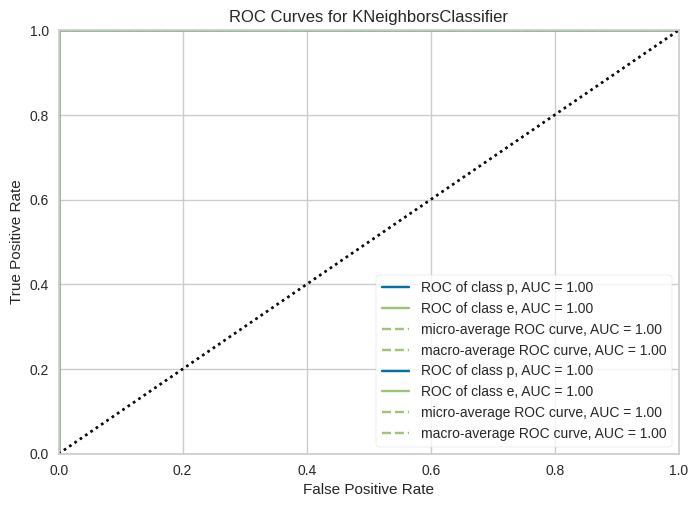

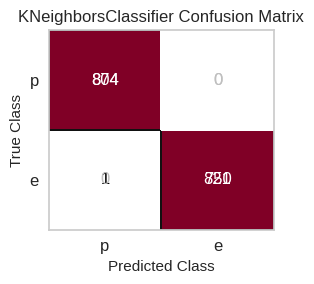

In [32]:
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
end_time = time.time()

training_time = end_time - start_time
print("The training time is: ",training_time)

Performance(knc)

#Naive Bayes

The training time is:  0.022814273834228516
REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       804
           1       1.00      1.00      1.00       821

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



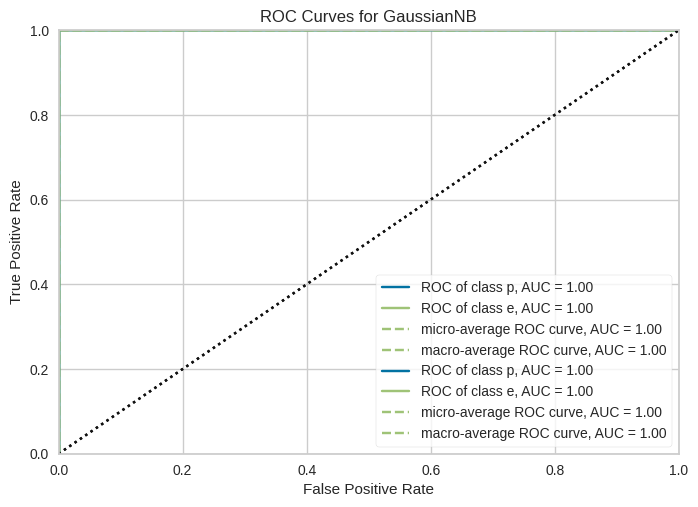

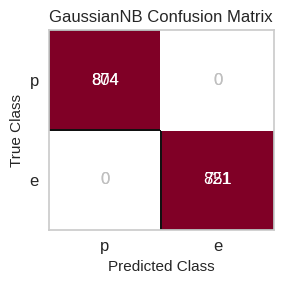

In [33]:
from sklearn.naive_bayes import GaussianNB

start_time = time.time()
gnb = GaussianNB()
gnb.fit(X_train,y_train)
end_time = time.time()

training_time = end_time - start_time
print("The training time is: ",training_time)

Performance(gnb)

#Ada Boost Classifier

The training time is:  0.018239974975585938
REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       804
           1       1.00      1.00      1.00       821

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



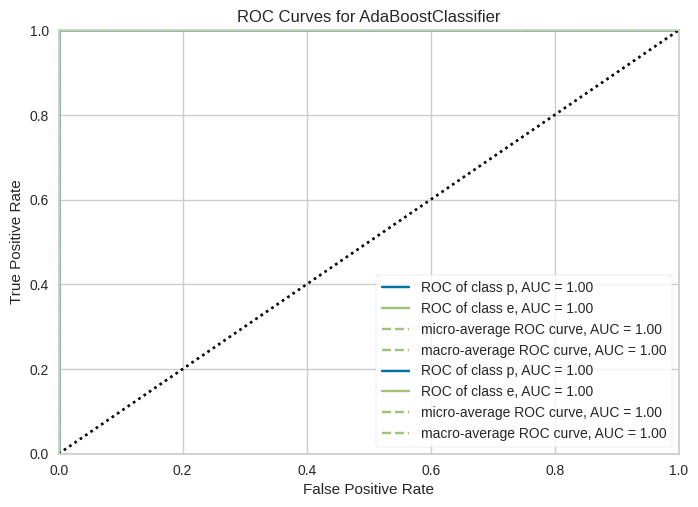

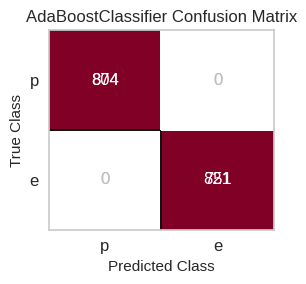

In [34]:
from sklearn.ensemble import AdaBoostClassifier

start_time = time.time()
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
end_time = time.time()

training_time = end_time - start_time
print("The training time is: ",training_time)
Performance(abc)

#LightGBM Classifier

[LightGBM] [Info] Number of positive: 2344, number of negative: 2530
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 4874, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.480919 -> initscore=-0.076360
[LightGBM] [Info] Start training from score -0.076360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

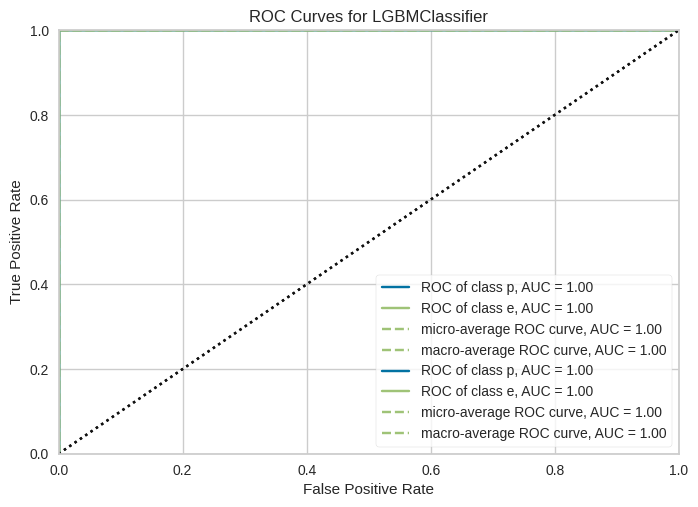

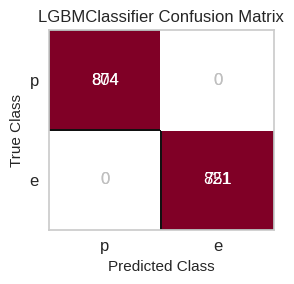

In [35]:
from lightgbm import LGBMClassifier

start_time = time.time()
lbgm = LGBMClassifier()
lbgm.fit(X_train,y_train)
end_time = time.time()

training_time = end_time - start_time
print("The training time is: ",training_time)
Performance(lbgm)

# Linear Discriminant Analysis

The training time is:  0.1152503490447998
REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       804
           1       1.00      1.00      1.00       821

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



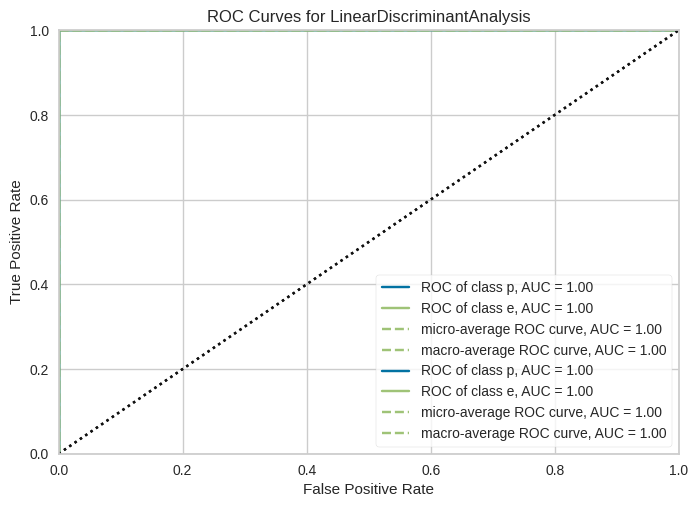

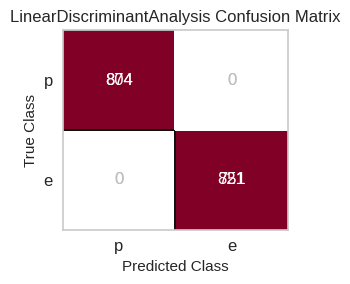

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

start_time = time.time()
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
end_time = time.time()

training_time = end_time - start_time
print("The training time is: ",training_time)

Performance(lda)

#Quadratic Discriminant Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


The training time is:  0.193894624710083
REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       804
           1       1.00      1.00      1.00       821

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



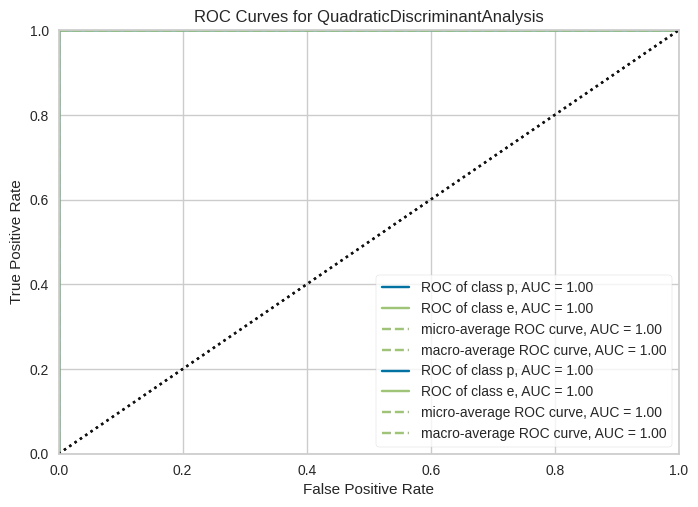

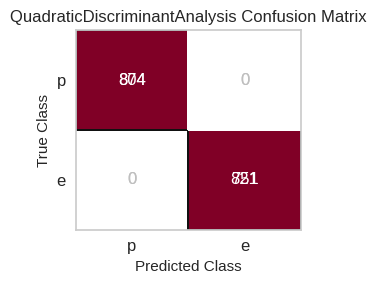

In [37]:
start_time = time.time()
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)
end_time = time.time()

training_time = end_time - start_time
print("The training time is: ",training_time)

Performance(qda)

#Gaussian Process Classifier

The training time is:  43.522343158721924
REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       804
           1       1.00      1.00      1.00       821

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



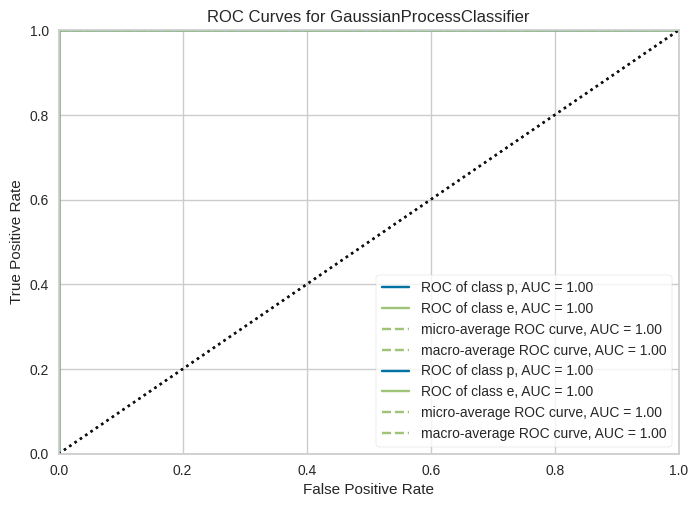

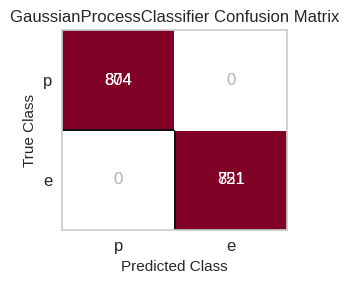

In [38]:
from sklearn.gaussian_process import GaussianProcessClassifier

start_time = time.time()
gpc = GaussianProcessClassifier()
gpc.fit(X_train,y_train)
end_time = time.time()

training_time = end_time - start_time
print("The training time is: ",training_time)

Performance(gpc)

In [40]:
model_list = [mlp, gbc, rfc, xrfc, xgbc, lgg, dtc, lsvc, svc, knc, gnb, abc, lbgm, lda, qda, gpc ]
CrossValidationScore(model_list)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3132, number of negative: 3367
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 6499, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.481920 -> initscore=-0.072350
[LightGBM] [Info] Start training from score -0.072350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Model Name,CVS
0,MLPClassifier,0.942630
1,GradientBoostingClassifier,1.000000
2,RandomForestClassifier,1.000000
3,XGBRFClassifier,1.000000
4,XGBClassifier,1.000000
5,LogisticRegression,1.000000
6,DecisionTreeClassifier,1.000000
7,LinearSVC,1.000000
8,SVC,0.913441
9,KNeighborsClassifier,0.951121


#Association Rule Learning Algo.

"Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. It is intended to identify strong rules discovered in databases using some measures of interestingness." (Koroglu, 2021)

#Apriori Algorithm

According to Koroglu (2021):


*   Apriori is designed to operate on databases containing transactions
*   Given a threshold C, the Apriori algorithm identifies the item sets which are subsets of at least C transactions in the database.
*   Apriori uses a "bottom up" approach, where frequent subsets are extended one item at a time (a step known as candidate generation), and groups of candidates are tested against the data. The algorithm terminates when no further successful extensions are found.
*   Apriori uses breadth-first search and a Hash tree structure to count candidate item sets efficiently.

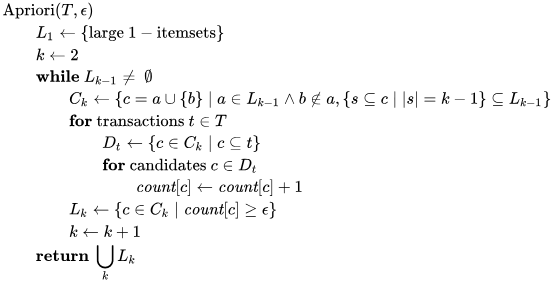



Let's use get_dummies for encoding unique values in features

In [41]:
df_ap = pd.get_dummies(df,prefix_sep="_")
df_ap.head()

,class_Edible,class_Poisonous,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [43]:
df1 =  apriori(df_ap, min_support=0.80, use_colnames = True, verbose=1)
df1.style.background_gradient("Greens")

Processing 5 combinations | Sampling itemset size 5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [

,support,itemsets
0,0.974151,frozenset({'gill-attachment_f'})
1,0.838503,frozenset({'gill-spacing_c'})
2,1.000000,frozenset({'veil-type_p'})
3,0.975382,frozenset({'veil-color_w'})
4,0.921713,frozenset({'ring-number_o'})
5,0.812654,"frozenset({'gill-attachment_f', 'gill-spacing_c'})"
6,0.974151,"frozenset({'gill-attachment_f', 'veil-type_p'})"
7,0.973166,"frozenset({'gill-attachment_f', 'veil-color_w'})"
8,0.898080,"frozenset({'gill-attachment_f', 'ring-number_o'})"
9,0.838503,"frozenset({'gill-spacing_c', 'veil-type_p'})"


In [44]:
association_rules(df1, metric = "support", min_threshold = 0.9).style.background_gradient("gist_earth_r")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,frozenset({'gill-attachment_f'}),frozenset({'veil-type_p'}),0.974151,1.000000,0.974151,1.000000,1.000000,0.000000,inf,0.000000
1,frozenset({'veil-type_p'}),frozenset({'gill-attachment_f'}),1.000000,0.974151,0.974151,0.974151,1.000000,0.000000,1.000000,0.000000
2,frozenset({'gill-attachment_f'}),frozenset({'veil-color_w'}),0.974151,0.975382,0.973166,0.998989,1.024203,0.022997,24.353767,0.914199
3,frozenset({'veil-color_w'}),frozenset({'gill-attachment_f'}),0.975382,0.974151,0.973166,0.997728,1.024203,0.022997,11.379452,0.959909
4,frozenset({'veil-color_w'}),frozenset({'veil-type_p'}),0.975382,1.000000,0.975382,1.000000,1.000000,0.000000,inf,0.000000
5,frozenset({'veil-type_p'}),frozenset({'veil-color_w'}),1.000000,0.975382,0.975382,0.975382,1.000000,0.000000,1.000000,0.000000
6,frozenset({'ring-number_o'}),frozenset({'veil-type_p'}),0.921713,1.000000,0.921713,1.000000,1.000000,0.000000,inf,0.000000
7,frozenset({'veil-type_p'}),frozenset({'ring-number_o'}),1.000000,0.921713,0.921713,0.921713,1.000000,0.000000,1.000000,0.000000
8,"frozenset({'gill-attachment_f', 'veil-color_w'})",frozenset({'veil-type_p'}),0.973166,1.000000,0.973166,1.000000,1.000000,0.000000,inf,0.000000
9,"frozenset({'gill-attachment_f', 'veil-type_p'})",frozenset({'veil-color_w'}),0.974151,0.975382,0.973166,0.998989,1.024203,0.022997,24.353767,0.914199


#Eclat Algorithm

Source: https://www.kaggle.com/code/rinichristy/association-rule-learning-apriori-eclat

In [45]:
%pip install apyori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=70d63ed8303b6ad56fab1b0bcdec26768c64942fe42a10ce3a4c53170f285b10
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [46]:
df_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 119 entries, class_Edible to habitat_w
dtypes: uint8(119)
memory usage: 944.2 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
import pandas as pd
transactions = []
for _, row in df_ap.iterrows():
    transaction = [index for index, value in enumerate(row) if value != 0]
    transactions.append(transaction)

print(transactions[:5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[1, 7, 10, 16, 23, 30, 34, 35, 38, 43, 51, 56, 60, 64, 73, 82, 84, 87, 90, 96, 99, 109, 117], [0, 7, 10, 21, 23, 24, 34, 35, 37, 43, 51, 55, 60, 64, 73, 82, 84, 87, 90, 96, 100, 108, 113], [0, 2, 10, 20, 23, 27, 34, 35, 37, 44, 51, 55, 60, 64, 73, 82, 84, 87, 90, 96, 100, 108, 115], [1, 7, 11, 20, 23, 30, 34, 35, 38, 44, 51, 56, 60, 64, 73, 82, 84, 87, 90, 96, 99, 109, 117], [0, 7, 10, 15, 22, 29, 34, 36, 37, 43, 52, 56, 60, 64, 73, 82, 84, 87, 90, 92, 100, 106, 113]]


In [49]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
results = list(rules)
results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[RelationRecord(items=frozenset({2, 20}), support=0.023387493845396356, ordered_statistics=[OrderedStatistic(items_base=frozenset({2}), items_add=frozenset({20}), confidence=0.42035398230088494, lift=3.2836113002042207)]),
 RelationRecord(items=frozenset({24, 2}), support=0.015755785327424915, ordered_statistics=[OrderedStatistic(items_base=frozenset({2}), items_add=frozenset({24}), confidence=0.2831858407079646, lift=5.751504424778761), OrderedStatistic(items_base=frozenset({24}), items_add=frozenset({2}), confidence=0.32, lift=5.751504424778761)]),
 RelationRecord(items=frozenset({2, 27}), support=0.015755785327424915, ordered_statistics=[OrderedStatistic(items_base=frozenset({2}), items_add=frozenset({27}), confidence=0.2831858407079646, lift=5.751504424778761), OrderedStatistic(items_base=frozenset({27}), items_add=frozenset({2}), confidence=0.32, lift=5.751504424778761)]),
 RelationRecord(items=frozenset({33, 2}), support=0.005908419497784343, ordered_statistics=[OrderedStatistic(

In [51]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    return list(zip(lhs, rhs, supports))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['class_Edible', 'class_Poisonous', 'Support'])

resultsinDataFrame.nlargest(n = 10, columns = 'Support')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,class_Edible,class_Poisonous,Support
193,53,104,0.275726
133,38,39,0.212703
136,39,53,0.212703
137,39,104,0.212703
86,26,98,0.194978
85,26,94,0.159527
221,59,94,0.159527
228,63,94,0.159527
291,94,98,0.159527
132,36,113,0.129985
